In [ ]:
import numpy as np
import pandas as pd 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import coremltools as ct



In [3]:
#importing Assuage multi-class data
Assuage_knn = pd.read_csv('../data/assauge-fake_corrolatedData.csv')
Assuage_knn.sample(n=10)

,Timestamp,Activity Trend,Heart Rate(bpm),Blood Pressure Systolic(mmHg),Blood Pressure Diastolic(mmHg),Body Mass Index,Body Fat Percent,Time Outside(min),Electrodermal Activity(microsiemens),Steps,Active Energy(cal),Screen Time(min),Hearing Level(dB),Cardio Fitness(V02 max),Heart Rate Variability(ms),Respiratory Rate(bpm),Inertial,Sleep Quality(hours),Distress Level
944,2024-03-01 16:31:35,5,78,114.0,73.4,23.93,9.059,244,6.5,5193,209.65,228,108,39,88,15.8,1,1,7.15067
551,2024-03-01 23:48:36,7,100,124.0,77.4,29.31,14.053,145,3.5,7129,314.45,288,100,35,75,18.0,9,2,8.01231
124,2024-03-01 21:02:13,6,81,112.5,71.5,19.71,-0.427,115,5.0,6242,297.10,320,75,25,50,16.1,5,7,7.62853
503,2024-03-01 03:42:24,4,81,108.5,67.1,27.48,12.674,197,6.0,3555,128.75,223,130,37,49,16.1,5,6,7.63360
267,2024-03-01 04:38:25,6,81,109.5,60.7,20.55,3.665,46,3.0,6325,310.25,379,47,45,98,16.1,1,7,6.55220
107,2024-03-01 21:53:31,1,73,102.5,66.5,31.14,18.432,146,4.5,712,66.60,242,85,32,36,15.3,10,10,8.04323
695,2024-03-01 13:12:25,5,82,116.0,74.6,19.74,3.612,13,1.5,4712,236.60,462,75,26,56,12.2,1,8,7.53848
142,2024-03-01 12:34:45,1,68,108.0,66.8,21.50,1.900,212,3.5,1433,58.65,242,5,28,63,10.8,3,10,6.94127
182,2024-03-01 18:09:46,8,102,116.0,70.6,28.09,11.467,177,5.0,8334,436.70,210,120,34,40,17.2,1,7,7.54046
33,2024-03-01 05:40:31,3,75,107.5,65.5,20.45,4.535,26,2.5,3316,141.80,422,108,29,48,14.5,5,2,8.92189


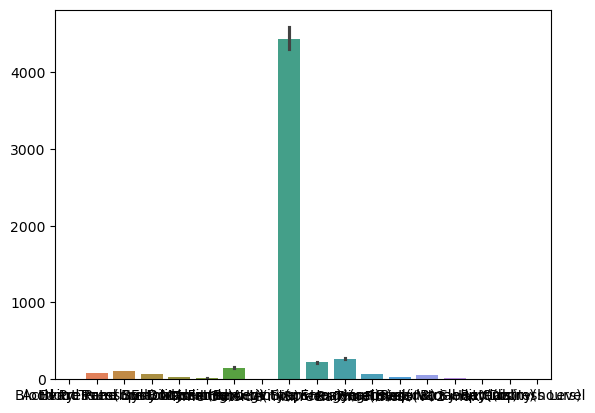

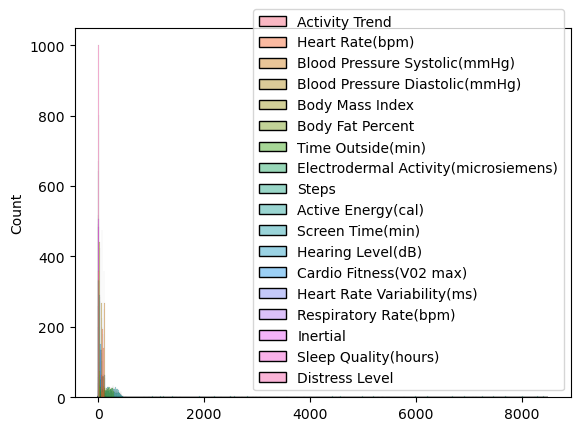

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt 

sb.barplot(Assuage_knn)
plt.show()
sb.histplot(Assuage_knn)
plt.show()

In [90]:
#turn assuage data to binary  0ne and zero
Assuage_knn['Distress Level'] = np.where(Assuage_knn['Distress Level'] > Assuage_knn['Distress Level'].median(), 1, 0)

X= Assuage_knn.iloc[:,1:17]
y= Assuage_knn.iloc[:,18]
y.astype(int)
X

,Activity Trend,Heart Rate(bpm),Blood Pressure Systolic(mmHg),Blood Pressure Diastolic(mmHg),Body Mass Index,Body Fat Percent,Time Outside(min),Electrodermal Activity(microsiemens),Steps,Active Energy(cal),Screen Time(min),Hearing Level(dB),Cardio Fitness(V02 max),Heart Rate Variability(ms),Respiratory Rate(bpm),Inertial
0,4,79,109.5,68.7,31.49,18.887,185,5.0,3880,192.00,208,74,31,51,14.9,8
1,7,90,119.0,74.4,32.72,18.486,271,8.5,6852,316.60,176,96,21,36,16.0,5
2,8,98,124.0,79.4,30.35,14.405,42,2.0,7818,432.90,432,38,39,56,14.8,7
3,2,67,107.5,68.5,27.37,9.531,259,5.0,1878,74.90,208,93,25,22,12.7,2
4,7,104,120.0,70.0,19.06,1.728,283,9.5,6849,335.45,81,56,31,66,17.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,69,99.5,57.7,19.25,2.975,152,4.0,1646,92.30,240,116,40,80,14.9,4
996,6,87,116.5,65.9,31.71,17.173,87,6.0,5742,305.10,303,37,30,62,12.7,1
997,8,105,119.5,73.7,26.47,9.361,224,6.0,7658,404.90,169,109,23,49,14.5,5
998,4,70,103.0,57.8,22.77,5.551,185,7.0,4318,245.90,293,126,27,45,11.0,2


Heat Map corrolation of new data

<Axes: >

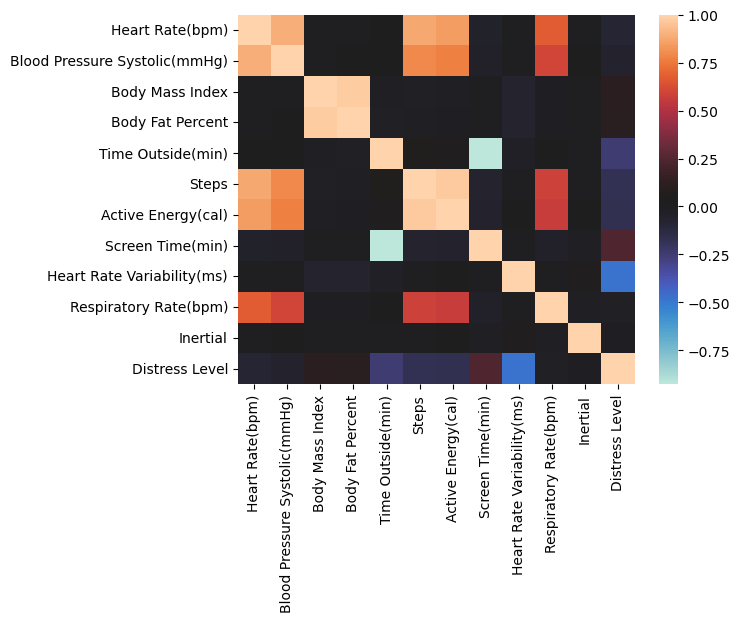

In [96]:
new_columns = ["Heart Rate(bpm)","Blood Pressure Systolic(mmHg)",
                   "Body Mass Index","Body Fat Percent","Time Outside(min)","Steps","Active Energy(cal)",
                   "Screen Time(min)","Heart Rate Variability(ms)","Respiratory Rate(bpm)","Inertial", "Distress Level"]
test_df = Assuage_knn[new_columns]
sb.heatmap(test_df.corr(), cmap = "icefire")
# test_df.sample()

Testing svm first

In [68]:
from sklearn.svm import LinearSVC

#using linearSVC
classifier = LinearSVC()
classifier.fit(X,y)

from sklearn.metrics import f1_score

predictions = classifier.predict(X)

f1_score(y, predictions, average='micro')

0.757

In [69]:
from sklearn.model_selection import train_test_split
# target_column = "Distress Level"

# feature_columns = ["Activity Trend","Heart Rate(bpm)","Blood Pressure Systolic(mmHg)","Blood Pressure Diastolic(mmHg)",
#                    "Body Mass Index","Body Fat Percent","Time Outside(min)","Electrodermal Activity(microsiemens)","Steps","Active Energy(cal)",
#                    "Screen Time(min)","Hearing Level(dB)","Cardio Fitness(V02 max)","Heart Rate Variability(ms)","Respiratory Rate(bpm)","Inertial",
#                    "Sleep Quality(hours)"]


# X = Assuage_knn[feature_columns]
# y = Assuage_knn[target_column]

#training and splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train

724    1
479    1
881    1
571    0
542    1
      ..
351    0
258    1
942    0
273    1
484    0
Name: Distress Level, Length: 800, dtype: int64

In [78]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

In [86]:
from sklearn.neighbors import KNeighborsClassifier


n_neighbors = 10

# KNN = takes the number of neighbirs, the amoint to classify by p, and the metric to measur ethe distance
KNN = KNeighborsClassifier(n_neighbors= n_neighbors, p= 2, metric='euclidean')


KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)


print('The confusion matrix is', cm)
print('The F1 score is', f1)
print('The accuracy score is', accuracy)

The confusion matrix is [[76 24]
 [43 57]]
The F1 score is 0.6298342541436464
The accuracy score is 0.665


In [108]:

#knn with data we will be using 
feature_columns = ['Heart Rate(bpm)', 'Blood Pressure Systolic(mmHg)', 'Body Mass Index', 
                   'Active Energy(cal)', 'Screen Time(min)', 'Heart Rate Variability(ms)', 
                   'Respiratory Rate(bpm)', 'Time Outside(min)', 'Steps']
target_column = 'Distress Level'


X = Assuage_knn[feature_columns]
y = Assuage_knn[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1 Score: {f1:.3f}')


Accuracy: 0.710
Precision: 0.734
Recall: 0.710
F1 Score: 0.702


In [ ]:
# # Convert the model to Core ML
# coreml_model = ct.converters.sklearn.convert(knn, input_features=feature_columns, output_feature_names='Level of Distress')

# # Save the Core ML model
# coreml_model.save('knn_distress.mlmodel')